In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import seaborn as sns

In [7]:
df=pd.read_csv("11-2-Dataset-Predicting Approval for Bank Loan.csv")

In [8]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
df.shape

(614, 13)

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df=df.drop(["Loan_ID","Gender","Married","Dependents","Education"],axis=1)

In [13]:
df.head()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].median())
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())

In [17]:
df.isnull().sum()

Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
Loan_Amount-Term      0
dtype: int64

In [18]:
df.columns

Index(['Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Loan_Amount-Term'],
      dtype='object')

In [19]:
df.loc[df["Self_Employed"]=="Yes","Self_Employed"]=1
df.loc[df["Self_Employed"]=="No","Self_Employed"]=0
df.loc[df["Loan_Status"]=="Y","Loan_Status"]=1
df.loc[df["Loan_Status"]=="N","Loan_Status"]=0

In [20]:
from sklearn.preprocessing import LabelEncoder
categorical_var = ['Loan_Status','Property_Area','Self_Employed']
le = LabelEncoder()
for i in categorical_var:
    df[i] = le.fit_transform(df[i])
df.head()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount-Term
0,0,5849,0.0,128.0,360.0,1.0,2,1,360.0
1,0,4583,1508.0,128.0,360.0,1.0,0,0,360.0
2,1,3000,0.0,66.0,360.0,1.0,2,1,360.0
3,0,2583,2358.0,120.0,360.0,1.0,2,1,360.0
4,0,6000,0.0,141.0,360.0,1.0,2,1,360.0


In [21]:
X=df.drop(["Loan_Status"],axis=1)
y=df['Loan_Status']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=156)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
my_model = LogisticRegression()

In [28]:
X=df.drop(["Loan_Status"],axis=1)
y=df['Loan_Status']

In [29]:
result = my_model.fit(X_train, y_train)

In [30]:
predictions = result.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8130081300813008

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
confusion_mat = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])

In [36]:
confusion_df

,Predicted neg,Predicted pos
Actual neg,20,21
Actual pos,2,80


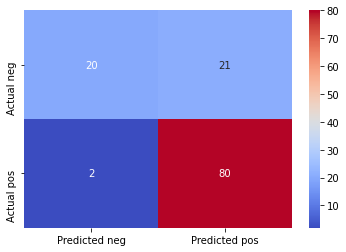

In [37]:
color_conf_matrix = sns.heatmap(confusion_df, cmap='coolwarm',annot =True)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
from sklearn.tree import DecisionTreeClassifier
my_model = DecisionTreeClassifier(random_state=0)
result = my_model.fit(X_train,y_train)

In [40]:
predictions = result.predict(X_test)
predictions

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [42]:
from sklearn.metrics import mean_absolute_error,accuracy_score
mean_absolute_error(y_test, predictions)

0.2845528455284553

In [43]:
accuracy_score(y_test,predictions)

0.7154471544715447

In [44]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,predictions,labels=[1,0])
matrix

'              precision    recall  f1-score   support\n\n           1       0.84      0.76      0.80        90\n           0       0.48      0.61      0.53        33\n\n    accuracy                           0.72       123\n   macro avg       0.66      0.68      0.66       123\nweighted avg       0.74      0.72      0.73       123\n'

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sn 
matrix=confusion_matrix(y_test,predictions)
print(matrix)

[[20 13]
 [22 68]]


In [46]:
confusion_df

,Predicted neg,Predicted pos
Actual neg,20,21
Actual pos,2,80


In [47]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions))


**Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.61      0.53        33
           1       0.84      0.76      0.80        90

    accuracy                           0.72       123
   macro avg       0.66      0.68      0.66       123
weighted avg       0.74      0.72      0.73       123



In [48]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
result=my_model.fit(X_train, y_train)

In [49]:
predictions = result.predict(X_test)
predictions

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [51]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7886178861788617


In [52]:
import seaborn as sn 
from sklearn.metrics import confusion_matrix
conf_matrix =confusion_matrix(predictions,y_test)
confusion_df = pd.DataFrame(conf_matrix, index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])
confusion_df

,Predicted 0,Predicted 1
Actual 0,16,9
Actual 1,17,81


In [54]:
from sklearn import metrics 
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions))


**Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.48      0.55        33
           1       0.83      0.90      0.86        90

    accuracy                           0.79       123
   macro avg       0.73      0.69      0.71       123
weighted avg       0.78      0.79      0.78       123



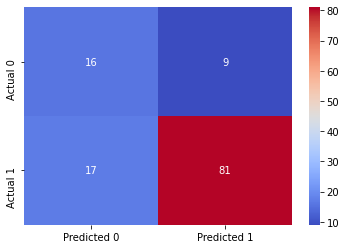

In [55]:
sn.heatmap(confusion_df, cmap='coolwarm',annot=True)

In [56]:
from sklearn.svm import SVC
my_result = SVC(kernel = 'rbf', random_state =0)
result = my_model.fit(X_train,y_train)

In [57]:
predictions = result.predict(X_test)

In [58]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7886178861788617


In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_mat = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'] ,columns=['Predicted neg','Predicted pos'])
confusion_df

,Predicted neg,Predicted pos
Actual neg,16,17
Actual pos,9,81


In [62]:
from sklearn.neighbors import KNeighborsClassifier
my_model = KNeighborsClassifier(n_neighbors=1)
result = my_model.fit(X_train,y_train)

In [63]:
predictions = result.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,predictions)

array([[ 9, 24],
       [29, 61]], dtype=int64)

In [65]:
confusion_df

,Predicted neg,Predicted pos
Actual neg,16,17
Actual pos,9,81


In [66]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.5691056910569106


In [67]:
from sklearn.cluster import KMeans

In [70]:
ssq=[]
for K in range(1,11):
    my_model = KMeans(n_clusters=K, random_state=123)
    result = my_model.fit(df)
    ssq.append(my_model.inertia_)

In [71]:
my_model = KMeans(n_clusters=2, random_state=123)
result= my_model.fit(df)
predictions = result.predict(df)

In [72]:
predictions[:5]

array([0, 0, 0, 0, 0])

Text(0.5, 1.0, 'Scree Plot')

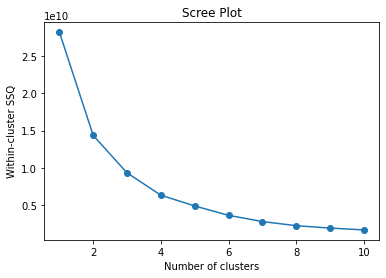

In [75]:
plt.plot(range(1,11), ssq, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster SSQ")
plt.title("Scree Plot")

In [76]:
plt.show()

In [77]:
import numpy as np
predictions_relabelled = np.where(predictions==0,"Y","N")
df['Loan_Status'] = pd.Series(predictions_relabelled, index=df.index)
df.index.name = "Serial Number"
pd.DataFrame(df)

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount-Term
Serial Number,,,,,,,,,
0,0,5849,0.0,128.0,360.0,1.0,2,Y,360.0
1,0,4583,1508.0,128.0,360.0,1.0,0,Y,360.0
2,1,3000,0.0,66.0,360.0,1.0,2,Y,360.0
3,0,2583,2358.0,120.0,360.0,1.0,2,Y,360.0
4,0,6000,0.0,141.0,360.0,1.0,2,Y,360.0
...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,Y,360.0
610,0,4106,0.0,40.0,180.0,1.0,0,Y,180.0
611,0,8072,240.0,253.0,360.0,1.0,2,Y,360.0


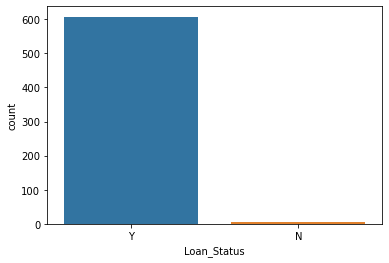

In [78]:
import seaborn as sns
sns.countplot(x= 'Loan_Status',data=df)

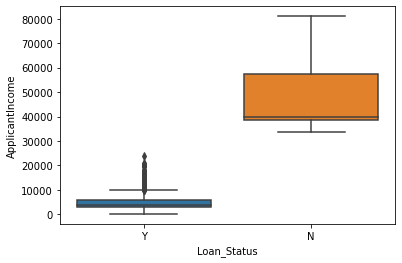

In [79]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome', data=df)

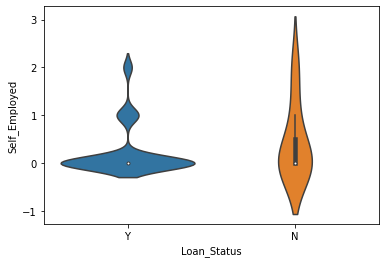

In [80]:
sns.violinplot(x="Loan_Status", y="Self_Employed",data=df, size=100)